In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

In [16]:
df = pd.read_csv('/Users/manishwagle/Desktop/Air Quality Intelligence/data/processed/processed_data.csv')

MAE: 7.44900146305779
MSE: 105.81810629114851
r2_score: 0.9196067366980334


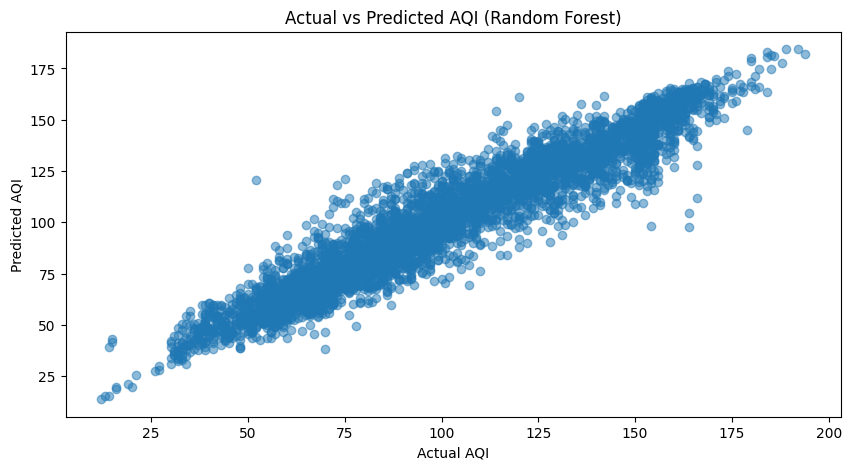

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Selecting features and target
features = df.drop(columns=["AQI", "Datetime"])  # Drop Datetime column
target = df["AQI"]
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Extra Trees Model
et = ExtraTreesRegressor(n_estimators=100, random_state=42)
et.fit(X_train, y_train)

# Make predictions
y_pred = et.predict(X_test)

# Evaluate model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

# Plot actual vs predicted AQI
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Extra Trees Regressor)")
plt.show()


In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Ensure catboost is install
from catboost import CatBoostRegressor

# List of models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(verbose=0)
]

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} - \n MAE: {mean_absolute_error(y_test, y_pred)},\n MSE: {mean_squared_error(y_test, y_pred)},\n r2_score: {r2_score(y_test, y_pred)}")



RandomForestRegressor - 
 MAE: 7.991536210680321,
 MSE: 122.09183189465983,
 r2_score: 0.9072430878556756
GradientBoostingRegressor - 
 MAE: 10.90030311259424,
 MSE: 199.81389823784343,
 r2_score: 0.8481952484744947
AdaBoostRegressor - 
 MAE: 17.798448295078718,
 MSE: 433.1212942920129,
 r2_score: 0.6709444586174852
BaggingRegressor - 
 MAE: 8.557626188734456,
 MSE: 139.06245610826628,
 r2_score: 0.8943499837488097
ExtraTreesRegressor - 
 MAE: 7.4614978054133125,
 MSE: 106.55783301024142,
 r2_score: 0.9190447436045649
XGBRegressor - 
 MAE: 8.533728407174022,
 MSE: 129.17090328792167,
 r2_score: 0.9018649000350955
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3647
[LightGBM] [Info] Number of data points in the train set: 21869, number of used features: 18
[LightGBM]

In [ ]:

import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load your full, original dataset
df = pd.read_csv('/Users/manishwagle/Desktop/Air Quality Intelligence/data/processed/processed_data.csv')

# Convert 'Datetime' to a datetime object to extract time features
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['hour'] = df['Datetime'].dt.hour
df['month'] = df['Datetime'].dt.month
# -----------------------------------------

# 2. Define the features and targets, now including time
# We add 'hour' and 'month' to our list of predictors
features = ['Temp (°C)', 'UV_Index', 'Cloud_Cover (%)', 'hour', 'month']
targets = ['Soil_Temp (°C)', 'Soil_Moisture (m³/m³)']

X = df[features]
y = df[targets]

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the multi-output model
base_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
multi_output_imputer = MultiOutputRegressor(estimator=base_model)
multi_output_imputer.fit(X_train, y_train)

# 5. Make predictions on the unseen test data
y_pred = multi_output_imputer.predict(X_test)

# 6. Evaluate the performance
print("--- UPGRADED Soil Imputation Model Performance ---")
r2 = r2_score(y_test, y_pred)
print(f"Overall R-squared Score: {r2:.4f}")

mae_temp = mean_absolute_error(y_test['Soil_Temp (°C)'], y_pred[:, 0])
mae_moisture = mean_absolute_error(y_test['Soil_Moisture (m³/m³)'], y_pred[:, 1])

print(f"\nSoil Temperature MAE: {mae_temp:.4f} °C")
print(f"Soil Moisture MAE: {mae_moisture:.4f} m³/m³")

# 7. Save the new, more powerful model
if r2 > 0.80: # We are now aiming for a higher quality threshold
    joblib.dump(multi_output_imputer, '../models/soil_imputer.pkl')
    print("\nModel performance is excellent! Saved new soil_imputer.pkl")
else:
    print(f"\nModel performance improved to R2={r2:.2f}. You can save it or continue tuning.")

--- UPGRADED Soil Imputation Model Performance ---
Overall R-squared Score: 0.8395

Soil Temperature MAE: 0.6735 °C
Soil Moisture MAE: 0.0377 m³/m³

Model performance is excellent! Saved new soil_imputer.pkl


In [20]:
import pickle 
import os

# Save the model
with open("model.pkl", "wb") as file:
    pickle.dump(et, file)
    # Ensure the models folder exists
    os.makedirs("models", exist_ok=True)

    # Save the model into the models folder
    with open("../models/model.pkl", "wb") as file:
        pickle.dump(et, file)



In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def generate_enhanced_synthetic_data(num_samples=10000):
    """
    Generates more realistic synthetic data to train the personal risk model.

    Improvements:
    - Non-linear age factor: Risk accelerates more significantly for older ages.
    - Interaction term: Adds extra risk if both health conditions are present.
    """
    print("Generating enhanced synthetic data...")
    # Base features
    ambient_aqi = np.random.randint(10, 400, size=num_samples)
    age = np.random.randint(5, 85, size=num_samples)
    
    # Binary features for health conditions
    has_respiratory_condition = np.random.choice([0, 1], size=num_samples, p=[0.85, 0.15]) # 15% have respiratory issues
    has_heart_condition = np.random.choice([0, 1], size=num_samples, p=[0.9, 0.1]) # 10% have heart issues

    # Create DataFrame
    df = pd.DataFrame({
        'ambient_aqi': ambient_aqi,
        'age': age,
        'has_respiratory_condition': has_respiratory_condition,
        'has_heart_condition': has_heart_condition
    })
    
    # --- Enhanced Logic for Perceived AQI ---
    # Start with the ambient AQI
    perceived_aqi = df['ambient_aqi'].copy()
    
    # --- Build a more complex risk multiplier ---

    # 1. Non-linear Age factor: Risk increases with the square of age over 40.
    # This makes the risk for a 70-year-old much more than double that of a 55-year-old.
    age_factor = ((df['age'] - 40).clip(lower=0) / 50)**2 * 0.25 # Max 25% increase, but curved
    
    # 2. Respiratory factor
    respiratory_factor = df['has_respiratory_condition'] * 0.30 # 30% increase
    
    # 3. Heart factor
    heart_factor = df['has_heart_condition'] * 0.25 # 25% increase
    
    # 4. Interaction factor: An additional penalty if both conditions are present.
    interaction_factor = (df['has_respiratory_condition'] * df['has_heart_condition']) * 0.15 # Extra 15% risk

    # Combine factors. The multiplier starts at 1.0
    risk_multiplier = 1.0 + age_factor + respiratory_factor + heart_factor + interaction_factor
    
    # Calculate the final perceived AQI
    df['perceived_aqi'] = perceived_aqi * risk_multiplier
    
    # Ensure perceived AQI is always >= ambient AQI and add some random noise for realism
    df['perceived_aqi'] = np.maximum(df['perceived_aqi'], df['ambient_aqi']) + np.random.normal(0, 3, size=num_samples)
    df['perceived_aqi'] = df['perceived_aqi'].round().astype(int)
    
    print(f"Generated {len(df)} samples.")
    print("Sample of the new generated data:\n", df.head())
    
    return df

def train_and_evaluate_model():
    """
    Trains an ExtraTreesRegressor on the synthetic data, evaluates its performance,
    and saves the model artifact.
    """
    df = generate_enhanced_synthetic_data()
    
    X = df[['ambient_aqi', 'age', 'has_respiratory_condition', 'has_heart_condition']]
    y = df['perceived_aqi']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print("\nTraining Personal Risk Model (ExtraTreesRegressor)...")
    model = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1, min_samples_leaf=2)
    model.fit(X_train, y_train)
    print("Model training complete.")
    
    # --- Model Evaluation ---
    print("\n--- Model Performance Evaluation ---")
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"R-squared (R2) Score:         {r2:.4f}")
    print(f"Mean Absolute Error (MAE):    {mae:.4f}")
    print(f"Mean Squared Error (MSE):     {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("------------------------------------")

    # --- Feature Importance ---
    print("\n--- Feature Importance ---")
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    print(feature_importance_df)
    print("--------------------------\n")

    # --- Save the Model ---
    models_dir = 'models'
    if not os.path.exists(models_dir):
        os.makedirs(models_dir)
        
    model_path = os.path.join(models_dir, 'personal_risk_model.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
        
    print(f"Personal risk model saved successfully to '{model_path}'")
    return model


In [2]:
train_and_evaluate_model()

Generating enhanced synthetic data...
Generated 10000 samples.
Sample of the new generated data:
    ambient_aqi  age  has_respiratory_condition  has_heart_condition  \
0           45   77                          0                    0   
1          160   45                          0                    0   
2           78   13                          0                    0   
3          106   62                          0                    0   
4          154   22                          1                    0   

   perceived_aqi  
0             50  
1            160  
2             71  
3            114  
4            200  

Training Personal Risk Model (ExtraTreesRegressor)...
Model training complete.

--- Model Performance Evaluation ---
R-squared (R2) Score:         0.9992
Mean Absolute Error (MAE):    2.7807
Mean Squared Error (MSE):     13.1864
Root Mean Squared Error (RMSE): 3.6313
------------------------------------

--- Feature Importance ---
                     featur

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False
